In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("../../../src/")

# NanoNets Simulation Tool
import nanonets
import nanonets_utils

#### String of N Nanoparticles

In [2]:
N_particles         = 3
network_topology    = "cubic"
topology_parameter  = {
    "Nx"    : N_particles,
    "Ny"    : 1,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[int((N_particles-1)/2),0,0],[N_particles-1,0,0]]
}

np_network_sim = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)

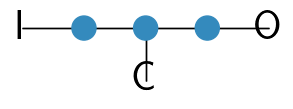

In [3]:
fig, ax = nanonets_utils.display_network(np_network_sim, height_scale=0.4, provide_electrode_labels=['I','C','O'],
                                         font_size=30, save_to_path='plots/network.pdf', margins=[0,0.2])

#### Electrode Voltages

In [4]:
N_voltages      = 1000
voltages        = np.zeros(shape=(N_voltages,np_network_sim.N_electrodes+1))
voltages[:,0]   = np.linspace(-0.1,0.1,N_voltages)
voltages        = np.vstack((voltages,voltages))
voltages        = np.vstack((voltages,voltages))

voltages[N_voltages:2*N_voltages,1] = 0.01
voltages[2*N_voltages:,1]           = 0.05
voltages

array([[-0.1      ,  0.       ,  0.       ,  0.       ],
       [-0.0997998,  0.       ,  0.       ,  0.       ],
       [-0.0995996,  0.       ,  0.       ,  0.       ],
       ...,
       [ 0.0995996,  0.05     ,  0.       ,  0.       ],
       [ 0.0997998,  0.05     ,  0.       ,  0.       ],
       [ 0.1      ,  0.05     ,  0.       ,  0.       ]])

#### Run Simulation

In [5]:
np_network_sim.run_const_voltages(voltages=voltages, target_electrode=2, save_th=0.1)

In [6]:
results = pd.DataFrame(np.hstack((voltages,np_network_sim.return_output_values())), columns=['I','C','O','G','JumpsEq','Jumps','Current','Error'])
results = results[results['Error'] != 0]
results

,I,C,O,G,JumpsEq,Jumps,Current,Error
0,-0.100000,0.00,0.0,0.0,1020.0,307.0,-1248.906000,61.357357
1,-0.099800,0.00,0.0,0.0,1020.0,409.0,-1289.401134,63.812797
2,-0.099600,0.00,0.0,0.0,1020.0,369.0,-1627.913357,80.813959
3,-0.099399,0.00,0.0,0.0,1020.0,319.0,-1557.067034,76.176779
4,-0.099199,0.00,0.0,0.0,1020.0,400.0,-1177.268112,57.701958
...,...,...,...,...,...,...,...,...
3994,0.098999,0.05,0.0,0.0,1020.0,133.0,2706.110430,132.597870
3995,0.099199,0.05,0.0,0.0,1020.0,128.0,2928.879022,145.647675
3996,0.099399,0.05,0.0,0.0,1020.0,119.0,2741.762874,136.320855
3997,0.099600,0.05,0.0,0.0,1020.0,122.0,2784.694171,137.040052


#### Display

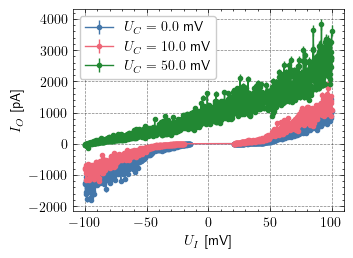

In [8]:
df1 = results[results['C']==0.0].sort_values(by='I')
df2 = results[results['C']==0.01].sort_values(by='I')
df3 = results[results['C']==0.05].sort_values(by='I')

with plt.style.context(["science","bright","grid"]):

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.errorbar(df1['I']*1000, df1['Current'], df1['Error'], marker='.', ls='-', label=f"$U_C = {0.0*1000}$ mV")
    ax.errorbar(df2['I']*1000, df2['Current'], df2['Error'], marker='.', ls='-', label=f"$U_C = {0.01*1000}$ mV")
    ax.errorbar(df3['I']*1000, df3['Current'], df3['Error'], marker='.', ls='-', label=f"$U_C = {0.05*1000}$ mV")
    ax.legend()
    ax.set_xlabel("$U_I$ [mV]")
    ax.set_ylabel("$I_O$ [pA]")
    fig.savefig("plots/iv_curves.pdf", bbox_inches='tight', transparent=True)